In [67]:
import torch
import numpy as np 
import matplotlib.pyplot as plt
import spatial_maps as sm

from tqdm import tqdm
from models import FFGC
from plotting_functions import *

import scipy

In [68]:
# instantiate feedforward model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = FFGC()
model.to(device)
model = model.load()

In [70]:
# evaluate on 64x64 grid
res = 64
x = np.linspace(-1, 1, res)*2*np.pi
y = np.linspace(-1, 1, res)*2*np.pi
xx, yy = np.meshgrid(x,y)
r = np.stack([xx.ravel(), yy.ravel()], axis = -1)
gs = model(torch.tensor(r.astype("float32"),device = device))
gs = gs.detach().cpu().numpy()
gs = gs.T.reshape(-1,res,res)
gs.shape

(256, 64, 64)

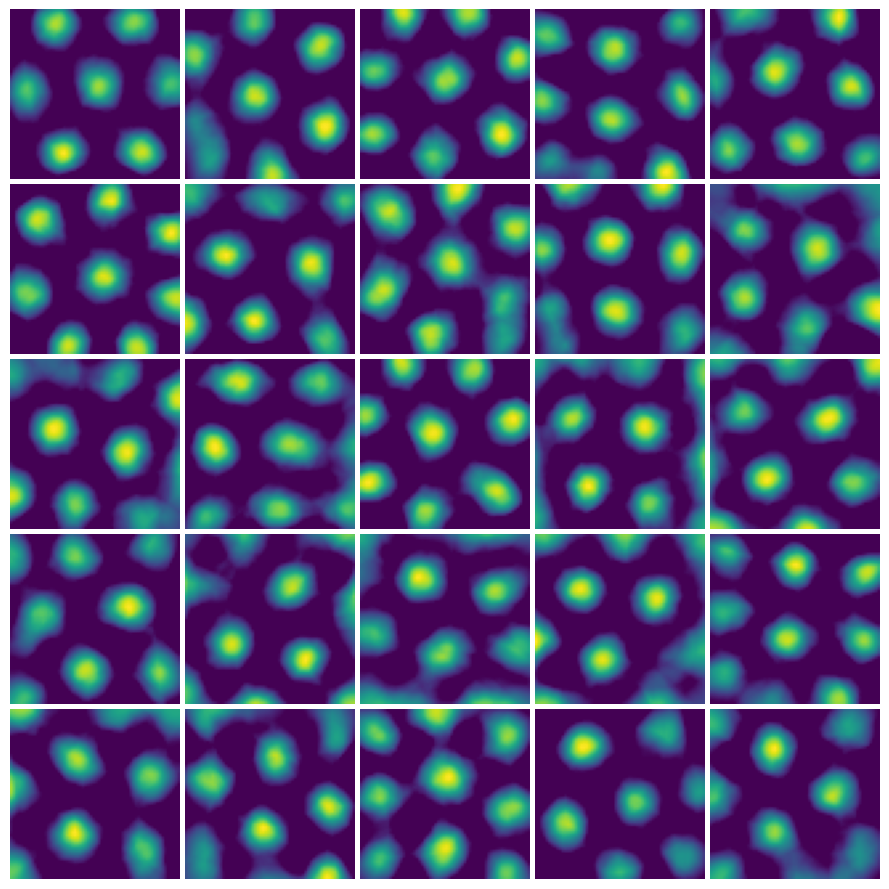

In [71]:
multiimshow(gs[:25], figsize=(10,10), normalize=False);

In [60]:
grid_score, mask = sm.gridness(gs[0], return_mask=True)

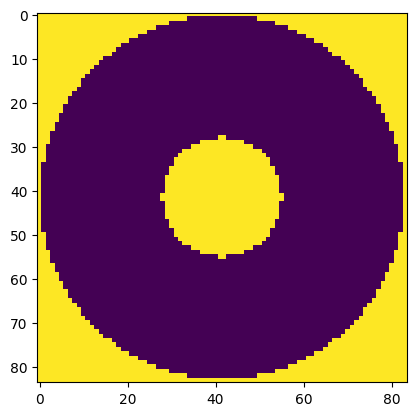

In [66]:
plt.imshow(mask.mask)

In [52]:
grid_score = [sm.gridness(gs[i]) for i in range(len(gs))]

/Users/vemundss/opt/anaconda3/envs/ml/lib/python3.9/site-packages/spatial_maps/tools.py:40: RuntimeWarning: invalid value encountered in divide
  arr1 = (arr1 - np.mean(a_)) / (np.std(a_) * len(a_))
/Users/vemundss/opt/anaconda3/envs/ml/lib/python3.9/site-packages/spatial_maps/tools.py:41: RuntimeWarning: invalid value encountered in divide
  arr2 = (arr2 - np.mean(v_)) / np.std(v_)
/Users/vemundss/opt/anaconda3/envs/ml/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: UserWarning: Warning: converting a masked element to nan.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


(array([ 1.,  0.,  1.,  1.,  4.,  3.,  2.,  3.,  5.,  6.,  7.,  7.,  8.,
        11., 10., 11., 11., 16., 12., 15., 14.,  7., 18., 13., 14.,  9.,
        10., 14., 10., 12.]),
 array([-1.08820834, -1.01191938, -0.93563042, -0.85934145, -0.78305249,
        -0.70676353, -0.63047457, -0.5541856 , -0.47789664, -0.40160768,
        -0.32531872, -0.24902975, -0.17274079, -0.09645183, -0.02016287,
         0.0561261 ,  0.13241506,  0.20870402,  0.28499298,  0.36128195,
         0.43757091,  0.51385987,  0.59014883,  0.6664378 ,  0.74272676,
         0.81901572,  0.89530468,  0.97159365,  1.04788261,  1.12417157,
         1.20046053]),
 <BarContainer object of 30 artists>)

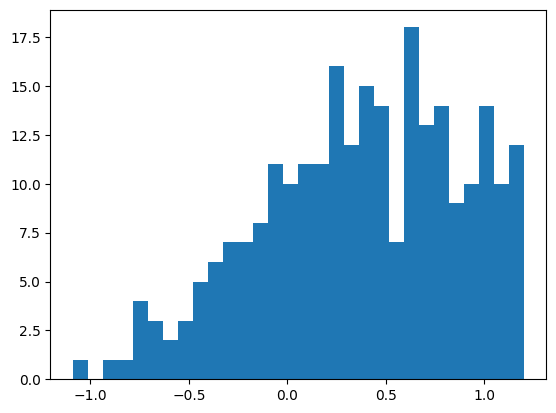

In [57]:
plt.hist(grid_score, bins = 30)

In [6]:
sm.find_peaks(gs[0])

array([[29, 33],
       [19, 22],
       [54, 20],
       [30,  6],
       [53, 49],
       [28, 60],
       [ 4, 46],
       [ 5, 16],
       [ 7, 63]])

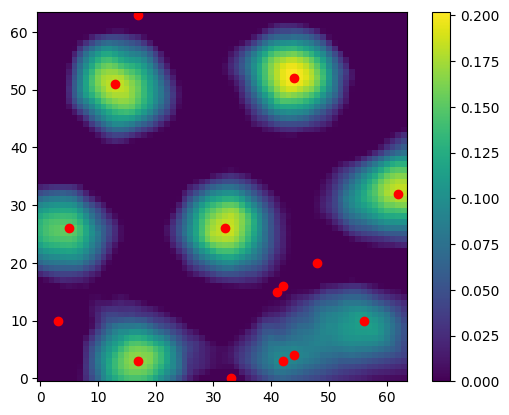

In [47]:
peaks = [sm.find_peaks(g) for g in gs]
idx = 1
plt.imshow(gs[idx].T, origin = "lower")
plt.colorbar()
plt.scatter(*peaks[idx].T, c = "r")

In [31]:
peaks[0].shape, gs[0].shape

((9, 2), (64, 64))

In [38]:
gs[0][peaks[0][:,0], peaks[0][:,1]]

array([0.17298457, 0.        , 0.2011918 , 0.14863804, 0.18599795,
       0.14313695, 0.16602212, 0.17749883, 0.        ], dtype=float32)

In [43]:
np.max(gs)

0.2959856